In [32]:
from prophet import Prophet
import pandas as pd

In [33]:
d=pd.read_csv(r"C:\Users\prernagupta\Desktop\jeans-s\jeans-s1.csv")


In [34]:
d

,TREND,BASE,ds,y,NSI,FSI_YHAT_LOWER,FSI_YHAT,FSI_YHAT_UPPER,NSI_YHAT_LOWER,NSI_YHAT,...,CATWALK_IMPACT,FSI_PIVOT_POINTS,NSI_PIVOT_POINTS,CREATED_AT,CREATED_BY,LEVELS,REGION,INNOVATOR_SMOOTHED_DATA,MASS_SMOOTHED_DATA,CONSERVATIVE_SMOOTHED_DATA
0,Straight Leg Jeans Uk,Jeans,02/01/2017,0.103457,0.131381,0.105581,0.115196,0.124973,0.095353,0.114460,...,0.0,"['2018-04-23', '2019-04-29', '2020-10-12']",['2017-01-09'],42:27.6,camillereyes,Style,UK,NaN,NaN,NaN
1,Straight Leg Jeans Uk,Jeans,09/01/2017,0.104491,0.126733,0.105803,0.115315,0.125135,0.097507,0.116257,...,0.0,"['2018-04-23', '2019-04-29', '2020-10-12']",['2017-01-09'],42:27.6,camillereyes,Style,UK,NaN,NaN,NaN
2,Straight Leg Jeans Uk,Jeans,16/01/2017,0.104296,0.122839,0.106388,0.115848,0.125474,0.098312,0.118010,...,0.0,"['2018-04-23', '2019-04-29', '2020-10-12']",['2017-01-09'],42:27.6,camillereyes,Style,UK,NaN,NaN,NaN
3,Straight Leg Jeans Uk,Jeans,23/01/2017,0.105378,0.119668,0.106823,0.116672,0.126062,0.100293,0.119543,...,0.0,"['2018-04-23', '2019-04-29', '2020-10-12']",['2017-01-09'],42:27.6,camillereyes,Style,UK,NaN,NaN,NaN
4,Straight Leg Jeans Uk,Jeans,30/01/2017,0.105947,0.117186,0.107509,0.117595,0.126775,0.101980,0.120792,...,0.0,"['2018-04-23', '2019-04-29', '2020-10-12']",['2017-01-09'],42:27.6,camillereyes,Style,UK,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,Straight Leg Jeans Uk,Jeans,13/11/2023,NaN,NaN,0.126386,0.149199,0.174656,0.133767,0.153440,...,NaN,"['2018-04-23', '2019-04-29', '2020-10-12']",['2017-01-09'],42:27.6,camillereyes,Style,UK,NaN,NaN,NaN
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
d=d.iloc[:, [2,3]]
df=d.dropna()
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

<ipython-input-4-6423561573a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds']= pd.to_datetime(df['ds'])


In [5]:
df

,ds,y
0,2017-02-01,0.103457
1,2017-09-01,0.104491
2,2017-01-16,0.104296
3,2017-01-23,0.105378
4,2017-01-30,0.105947
...,...,...
254,2021-11-15,0.143500
255,2021-11-22,0.144454
256,2021-11-29,0.145709
257,2021-06-12,0.151343


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


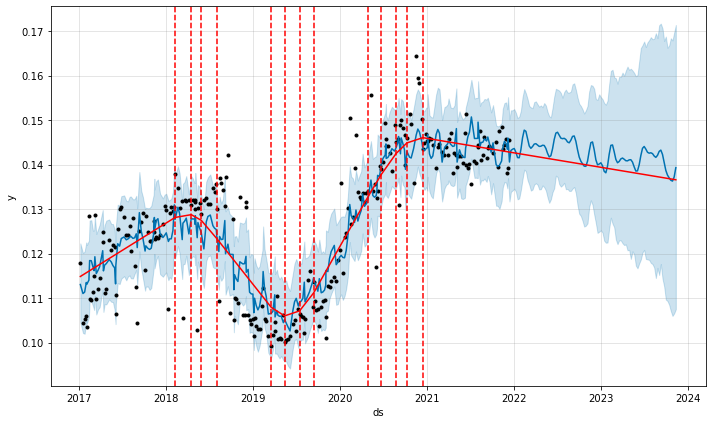

In [6]:

from prophet.plot import add_changepoints_to_plot
m = Prophet(yearly_seasonality=True, changepoint_range=0.8 ,changepoint_prior_scale=0.05)
# define the model
# fit the model
m.fit(df)
future = m.make_future_dataframe(periods=100, freq='W')
#prop only uses weekly seasonlity, and change points for first 80%
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

INFO:prophet:Making 4 forecasts with cutoffs between 2019-06-22 00:00:00 and 2020-12-13 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

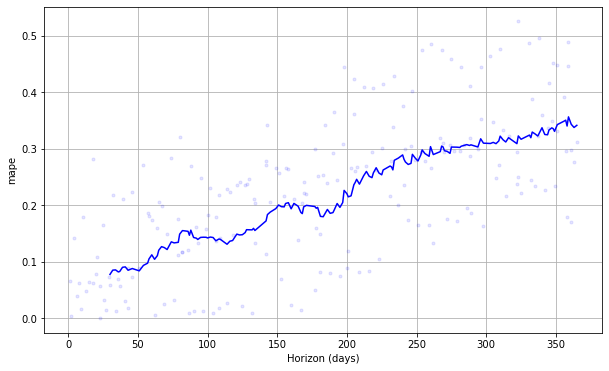

In [7]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [9]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,30 days,0.000177,0.013292,0.010030,0.077252,0.062164,0.080994,0.6
1,32 days,0.000208,0.014437,0.010906,0.084850,0.062164,0.090018,0.6
2,34 days,0.000209,0.014442,0.010973,0.085262,0.062164,0.090425,0.6
3,36 days,0.000200,0.014125,0.010635,0.081617,0.062164,0.086128,0.6
4,37 days,0.000200,0.014136,0.010663,0.082491,0.062164,0.087122,0.6


In [35]:
q=d

In [36]:
q=q.iloc[:, [2,3,11,12,13]]

In [37]:
q

,ds,y,FRESHNESS_INDEX,MARKDOWN_INDEX,FASHION_LEADERS_INDEX
0,02/01/2017,0.103457,-0.057143,1.032417,0.332051
1,09/01/2017,0.104491,-0.030445,1.033660,0.341849
2,16/01/2017,0.104296,-0.003701,1.034876,0.351171
3,23/01/2017,0.105378,0.023088,1.036066,0.360017
4,30/01/2017,0.105947,0.049923,1.037230,0.368388
...,...,...,...,...,...
358,13/11/2023,NaN,0.350565,1.086574,0.702550
359,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN


In [28]:
q['ds']= pd.to_datetime(q['ds'])

<ipython-input-28-3511fa8656bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q['ds']= pd.to_datetime(q['ds'])


In [38]:
q

,ds,y,FRESHNESS_INDEX,MARKDOWN_INDEX,FASHION_LEADERS_INDEX
0,02/01/2017,0.103457,-0.057143,1.032417,0.332051
1,09/01/2017,0.104491,-0.030445,1.033660,0.341849
2,16/01/2017,0.104296,-0.003701,1.034876,0.351171
3,23/01/2017,0.105378,0.023088,1.036066,0.360017
4,30/01/2017,0.105947,0.049923,1.037230,0.368388
...,...,...,...,...,...
358,13/11/2023,NaN,0.350565,1.086574,0.702550
359,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN


In [39]:
df_train = q.loc[q["ds"]<="2021-12-13"]
df_test  = q.loc[q["ds"]>="2021-12-13"]

In [40]:
from prophet.plot import add_changepoints_to_plot
m = Prophet( changepoint_range=0.8 ,changepoint_prior_scale=0.1)
m.add_regressor('FRESHNESS_INDEX')
m.add_regressor('MARKDOWN_INDEX')
m.add_regressor('FASHION_LEADERS_INDEX')

# define the model
# fit the model
m.fit(df_train)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


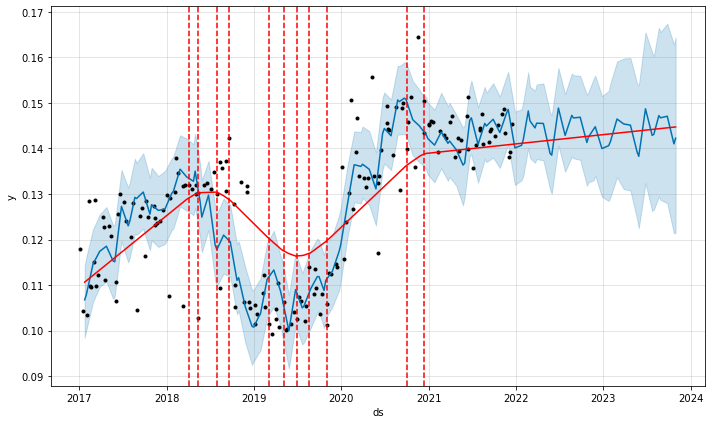

In [41]:
forecast = m.predict(df_test.drop(columns="y"))
#prop only uses weekly seasonlity, and change points for first 80%

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [42]:
forecast.to_csv(r'C:\Users\prernagupta\Desktop\jeans-s\jeans-s-multi.csv')

In [43]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
from prophet.diagnostics import performance_metrics



INFO:prophet:Making 4 forecasts with cutoffs between 2019-06-22 00:00:00 and 2020-12-13 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

In [44]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,32 days,0.000102,0.010114,0.007591,0.060219,0.046291,0.063568,0.769231
1,34 days,0.000103,0.010151,0.007682,0.060848,0.046291,0.064261,0.769231
2,36 days,0.000096,0.009810,0.007024,0.054228,0.040219,0.057299,0.846154
3,43 days,0.000065,0.008065,0.006089,0.047891,0.040219,0.050037,0.884615
4,46 days,0.000057,0.007525,0.006197,0.051417,0.040219,0.053717,0.769231


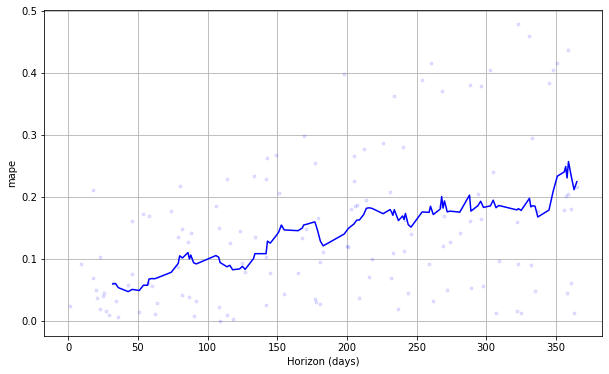

In [45]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
